In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [ ]:
file_path = '/content/drive/My Drive/Crop_yields'

In [ ]:
os.listdir(file_path)

['climate_data.csv', 'crop.csv', 'pesticide.csv', 'crops.csv']

In [ ]:
climate_path = '/content/drive/My Drive/Crop_yields/climate_data.csv'
crop_path = '/content/drive/My Drive/Crop_yields/crops.csv'
pesticide_path = '/content/drive/My Drive/Crop_yields/pesticide.csv'

Preparing climate dataset

In [ ]:
df_climate = pd.read_csv(climate_path)
df_climate.head(5)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


In [ ]:
column_mapping = {
    'Tn': 'min temperature',
    'Tx': 'max temperature',
    'Tavg': 'avg temperature',
    'RH_avg': 'avg humidity',
    'RR': 'rainfall',
    'ss': 'duration of sunshine',
    'ff_x': 'max wind speed',
    'ddd_x': 'wind direction at maximum speed',
    'ff_avg': 'avg wind speed',
    'ddd_car': 'most wind direction',
    'station_id': 'station id which record the data'
}

df_climate.rename(columns=column_mapping, inplace=True)

In [ ]:
df_climate.head(5)

,date,min temperature,max temperature,avg temperature,avg humidity,rainfall,duration of sunshine,max wind speed,wind direction at maximum speed,avg wind speed,most wind direction,station id which record the data
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


In [ ]:
df_climate.drop(columns=['min temperature', 'max temperature', 'station id which record the data', 'most wind direction', 'avg wind speed', 'wind direction at maximum speed', 'max wind speed', 'duration of sunshine'], inplace=True)

In [ ]:
df_climate.head(5)

,date,avg temperature,avg humidity,rainfall
0,01-01-2010,27.1,82.0,9.0
1,02-01-2010,25.7,95.0,24.0
2,03-01-2010,24.5,98.0,63.0
3,04-01-2010,25.8,90.0,0.0
4,05-01-2010,26.7,90.0,2.0


In [ ]:
df_climate['date'] = pd.to_datetime(df_climate['date'], format='%d-%m-%Y')
df_climate['Year'] = df_climate['date'].dt.year
df_climate = df_climate.groupby('Year').mean().reset_index()
df_climate.drop(columns=['date'], inplace=True)

In [ ]:
df_climate.head(5)

,Year,avg temperature,avg humidity,rainfall
0,2010,26.820524,83.574186,9.070017
1,2011,26.470072,82.204894,7.454504
2,2012,26.641317,81.787369,7.406179
3,2013,26.706827,82.768752,8.819343
4,2014,26.791682,81.822964,7.926745


Preparing crop dataset

In [ ]:
df_crop = pd.read_csv(crop_path)
df_crop.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1929.07,"Abaca, manila hemp, raw",2010,2010,100 g/ha,8275,E,Estimated value,NaN
1,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1929.07,"Abaca, manila hemp, raw",2011,2011,100 g/ha,8267,E,Estimated value,NaN
2,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1929.07,"Abaca, manila hemp, raw",2012,2012,100 g/ha,7647,E,Estimated value,NaN
3,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1929.07,"Abaca, manila hemp, raw",2013,2013,100 g/ha,8571,E,Estimated value,NaN
4,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1929.07,"Abaca, manila hemp, raw",2014,2014,100 g/ha,8237,E,Estimated value,NaN


In [ ]:
df_crop.drop(columns=['Flag', 'Domain', 'Element', 'Domain Code', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Flag Description', 'Note'], inplace=True)

In [ ]:
df_crop.head(5)

,Area,Item,Year,Unit,Value
0,Indonesia,"Abaca, manila hemp, raw",2010,100 g/ha,8275
1,Indonesia,"Abaca, manila hemp, raw",2011,100 g/ha,8267
2,Indonesia,"Abaca, manila hemp, raw",2012,100 g/ha,7647
3,Indonesia,"Abaca, manila hemp, raw",2013,100 g/ha,8571
4,Indonesia,"Abaca, manila hemp, raw",2014,100 g/ha,8237


In [ ]:
df_crop['hg/ha yield'] = df_crop['Value'] / 10
df_crop.drop(columns=['Unit', 'Value'], inplace=True)

In [ ]:
df_crop.head(15)

,Area,Item,Year,hg/ha yield
0,Indonesia,"Abaca, manila hemp, raw",2010,827.5
1,Indonesia,"Abaca, manila hemp, raw",2011,826.7
2,Indonesia,"Abaca, manila hemp, raw",2012,764.7
3,Indonesia,"Abaca, manila hemp, raw",2013,857.1
4,Indonesia,"Abaca, manila hemp, raw",2014,823.7
5,Indonesia,"Abaca, manila hemp, raw",2015,793.7
6,Indonesia,"Abaca, manila hemp, raw",2016,826.1
7,Indonesia,"Abaca, manila hemp, raw",2017,800.9
8,Indonesia,"Abaca, manila hemp, raw",2018,838.6
9,Indonesia,"Abaca, manila hemp, raw",2019,790.7


Preparing pesticide dataset

In [ ]:
df_pesticide = pd.read_csv(pesticide_path)
df_pesticide.head(5)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,360,Indonesia,5157,Agricultural Use,1357,Pesticides (total),2010,2010,t,313639.25,E,Estimated value,NaN
1,RP,Pesticides Use,360,Indonesia,5159,Use per area of cropland,1357,Pesticides (total),2010,2010,kg/ha,7.07,E,Estimated value,NaN
2,RP,Pesticides Use,360,Indonesia,5172,Use per capita,1357,Pesticides (total),2010,2010,kg/cap,1.29,E,Estimated value,NaN
3,RP,Pesticides Use,360,Indonesia,5173,Use per value of agricultural production,1357,Pesticides (total),2010,2010,g/Int$,3.94,E,Estimated value,NaN
4,RP,Pesticides Use,360,Indonesia,5157,Agricultural Use,1357,Pesticides (total),2011,2011,t,206061.70,E,Estimated value,NaN


In [ ]:
df_pesticide.drop(columns=['Item', 'Item Code', 'Domain', 'Element', 'Domain Code', 'Area Code (M49)', 'Element Code', 'Year Code', 'Flag Description', 'Note', 'Flag'], inplace=True)

In [ ]:
df_pesticide.head(15)

,Area,Year,Unit,Value
0,Indonesia,2010,t,313639.25
1,Indonesia,2010,kg/ha,7.07
2,Indonesia,2010,kg/cap,1.29
3,Indonesia,2010,g/Int$,3.94
4,Indonesia,2011,t,206061.70
5,Indonesia,2011,kg/ha,4.54
6,Indonesia,2011,kg/cap,0.83
7,Indonesia,2011,g/Int$,2.52
8,Indonesia,2012,t,254912.71
9,Indonesia,2012,kg/ha,5.61


In [ ]:
conversion_factors = {
    't': 1,
    'kg/ha': 1 / 1000,
    'kg/cap': 1,
    'g/Int$': 1 / 1000
}

for index, row in df_pesticide.iterrows():
    unit = row['Unit']
    value = row['Value']
    conversion_factor = conversion_factors[unit]
    df_pesticide.at[index, 'Value'] = value * conversion_factor
    df_pesticide.at[index, 'Unit'] = 'kg/tonne'

df_pesticide = df_pesticide.groupby('Year').max().reset_index()

In [ ]:
df_pesticide.head(15)

,Year,Area,Unit,Value
0,2010,Indonesia,kg/tonne,313639.25
1,2011,Indonesia,kg/tonne,206061.70
2,2012,Indonesia,kg/tonne,254912.71
3,2013,Indonesia,kg/tonne,314990.40
4,2014,Indonesia,kg/tonne,253450.88
5,2015,Indonesia,kg/tonne,313069.12
6,2016,Indonesia,kg/tonne,349797.63
7,2017,Indonesia,kg/tonne,279005.69
8,2018,Indonesia,kg/tonne,261305.81
9,2019,Indonesia,kg/tonne,274421.03


Merging the dataset based on the year

In [ ]:
df_crop = pd.merge(df_crop, df_climate, on="Year", how="left")
df_crop = pd.merge(df_crop, df_pesticide, on="Year", how="left")

df_crop.head(5)


,Area_x,Item,Year,hg/ha yield,avg temperature,avg humidity,rainfall,Area_y,Unit,Value
0,Indonesia,"Abaca, manila hemp, raw",2010,827.5,26.820524,83.574186,9.070017,Indonesia,kg/tonne,313639.25
1,Indonesia,"Abaca, manila hemp, raw",2011,826.7,26.470072,82.204894,7.454504,Indonesia,kg/tonne,206061.70
2,Indonesia,"Abaca, manila hemp, raw",2012,764.7,26.641317,81.787369,7.406179,Indonesia,kg/tonne,254912.71
3,Indonesia,"Abaca, manila hemp, raw",2013,857.1,26.706827,82.768752,8.819343,Indonesia,kg/tonne,314990.40
4,Indonesia,"Abaca, manila hemp, raw",2014,823.7,26.791682,81.822964,7.926745,Indonesia,kg/tonne,253450.88


In [ ]:
df_crop.drop(columns='Area_y', inplace=True)

In [ ]:
df_crop.head(5)

,Area_x,Item,Year,hg/ha yield,avg temperature,avg humidity,rainfall,Unit,Value
0,Indonesia,"Abaca, manila hemp, raw",2010,827.5,26.820524,83.574186,9.070017,kg/tonne,313639.25
1,Indonesia,"Abaca, manila hemp, raw",2011,826.7,26.470072,82.204894,7.454504,kg/tonne,206061.70
2,Indonesia,"Abaca, manila hemp, raw",2012,764.7,26.641317,81.787369,7.406179,kg/tonne,254912.71
3,Indonesia,"Abaca, manila hemp, raw",2013,857.1,26.706827,82.768752,8.819343,kg/tonne,314990.40
4,Indonesia,"Abaca, manila hemp, raw",2014,823.7,26.791682,81.822964,7.926745,kg/tonne,253450.88


In [ ]:
column_mapping = {
    'Value': 'Pesticide',
    'hg/ha yield': 'yield',
}
df_crop.rename(columns=column_mapping, inplace=True)
df_crop.drop(columns='Area_x', inplace=True)

In [ ]:
df_crop.head(5)

,Item,Year,yield,avg temperature,avg humidity,rainfall,Unit,Pesticide
0,"Abaca, manila hemp, raw",2010,827.5,26.820524,83.574186,9.070017,kg/tonne,313639.25
1,"Abaca, manila hemp, raw",2011,826.7,26.470072,82.204894,7.454504,kg/tonne,206061.70
2,"Abaca, manila hemp, raw",2012,764.7,26.641317,81.787369,7.406179,kg/tonne,254912.71
3,"Abaca, manila hemp, raw",2013,857.1,26.706827,82.768752,8.819343,kg/tonne,314990.40
4,"Abaca, manila hemp, raw",2014,823.7,26.791682,81.822964,7.926745,kg/tonne,253450.88


In [ ]:
df_crop.to_csv('df_fin.csv', index=False)

In [ ]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Item             780 non-null    object 
 1   Year             780 non-null    int64  
 2   yield            780 non-null    float64
 3   avg temperature  660 non-null    float64
 4   avg humidity     660 non-null    float64
 5   rainfall         660 non-null    float64
 6   Unit             720 non-null    object 
 7   Pesticide        720 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 48.9+ KB


In [ ]:
df_crop.isnull().sum()

Item                 0
Year                 0
yield                0
avg temperature    120
avg humidity       120
rainfall           120
Unit                60
Pesticide           60
dtype: int64

In [ ]:
df_predict = df_crop[df_crop['Year'] == 2020]
df_testing = df_crop[df_crop['Year'] == 2022]
df_crop = df_crop[(df_crop['Year'] != 2020) & (df_crop['Year'] != 2021) & (df_crop['Year'] != 2022)]


In [ ]:
df_crop.isnull().sum()

Item               0
Year               0
yield              0
avg temperature    0
avg humidity       0
rainfall           0
Unit               0
Pesticide          0
dtype: int64

In [ ]:
df_crop.head(5)

,Item,Year,yield,avg temperature,avg humidity,rainfall,Unit,Pesticide
0,"Abaca, manila hemp, raw",2010,827.5,26.820524,83.574186,9.070017,kg/tonne,313639.25
1,"Abaca, manila hemp, raw",2011,826.7,26.470072,82.204894,7.454504,kg/tonne,206061.70
2,"Abaca, manila hemp, raw",2012,764.7,26.641317,81.787369,7.406179,kg/tonne,254912.71
3,"Abaca, manila hemp, raw",2013,857.1,26.706827,82.768752,8.819343,kg/tonne,314990.40
4,"Abaca, manila hemp, raw",2014,823.7,26.791682,81.822964,7.926745,kg/tonne,253450.88


In [ ]:
df_crop.drop(columns='Unit', inplace=True)

In [ ]:
data_cleaned = df_crop

le_country = LabelEncoder()
le_item = LabelEncoder()
data_cleaned['Item_Encoded'] = le_item.fit_transform(data_cleaned['Item'])

X = data_cleaned[['Item_Encoded', 'Pesticide', 'avg temperature', 'avg humidity', 'rainfall', 'Year']]
y = data_cleaned['yield']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
dataset = np.column_stack((X_train, y_train))

num_synthetic_samples = 2000

synthetic_data = np.zeros((num_synthetic_samples, dataset.shape[1]))

for i in range(num_synthetic_samples):
    indices = np.random.choice(len(dataset), size=len(dataset), replace=True)

    bootstrap_sample = dataset[indices]

    synthetic_data[i] = bootstrap_sample.mean(axis=0)

X_synthetic = synthetic_data[:, :-1]
y_synthetic = synthetic_data[:, -1]

In [ ]:
X_synthetic.shape

(2000, 6)

In [ ]:
X_train = np.vstack((X_train, X_synthetic))
y_train = np.concatenate((y_train, y_synthetic))

In [ ]:
print(X_train.shape)

(2420, 6)


In [ ]:
y_train.shape

(2420,)

In [ ]:
X_test.shape

(180, 6)

The accuracy of the Linear Regression Model Train is 2.21
The accuracy of the  Linear Regression Model Test is 0.72


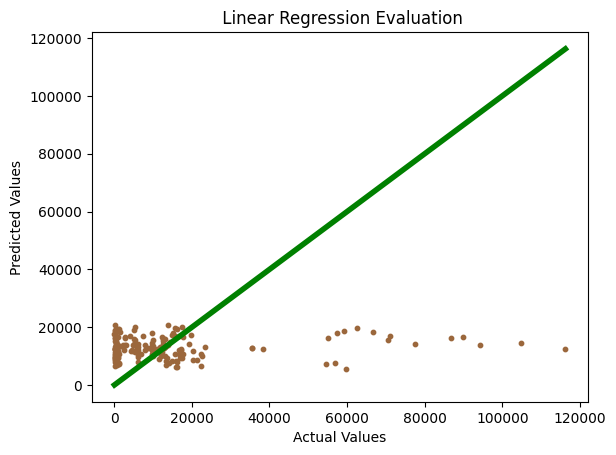

The accuracy of the Random Forest Model Train is 99.26
The accuracy of the  Random Forest Model Test is 96.49


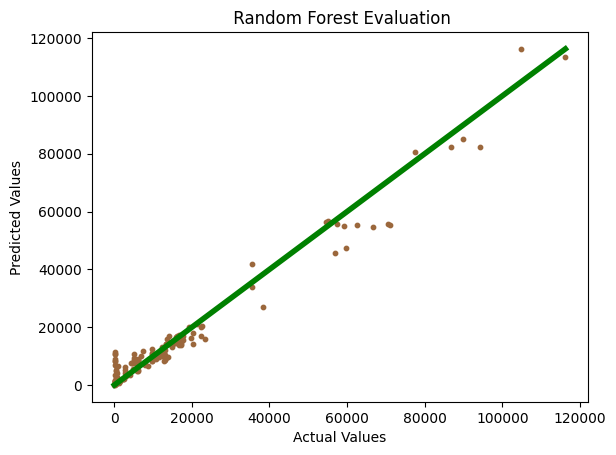

The accuracy of the Gradient Boost Model Train is 94.98
The accuracy of the  Gradient Boost Model Test is 93.70


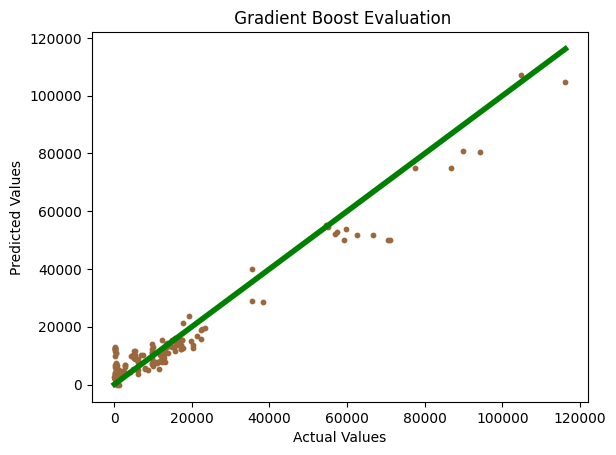

The accuracy of the XGBoost Model Train is 90.42
The accuracy of the  XGBoost Model Test is -6.77


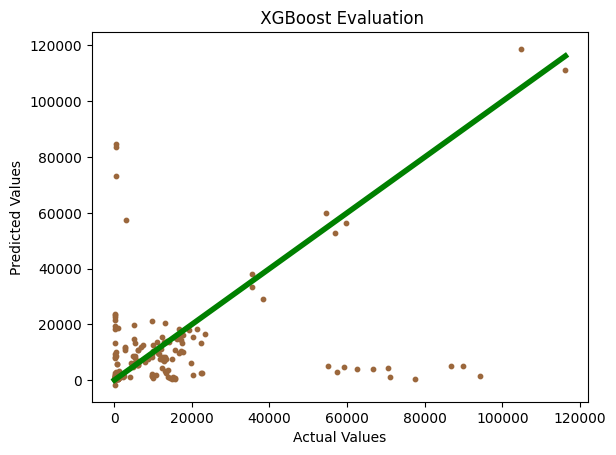

The accuracy of the KNN Model Train is 39.69
The accuracy of the  KNN Model Test is -11.83


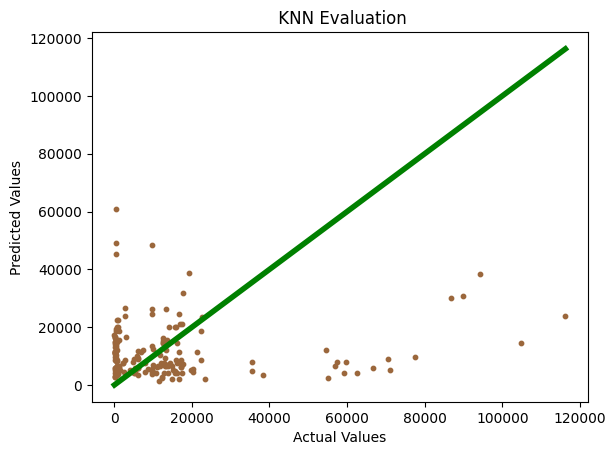

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 98.62


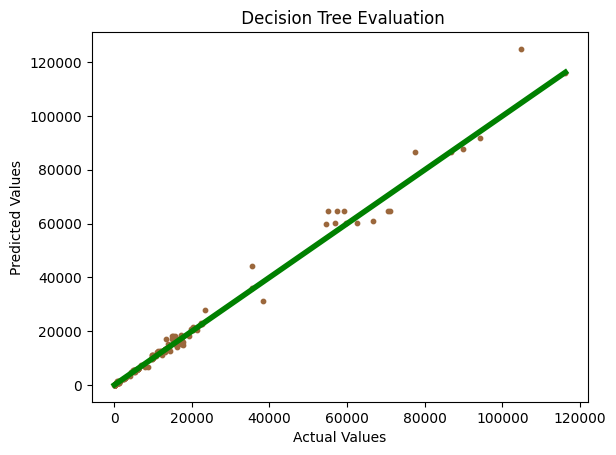

The accuracy of the Bagging Regressor Model Train is 99.21
The accuracy of the  Bagging Regressor Model Test is 96.31


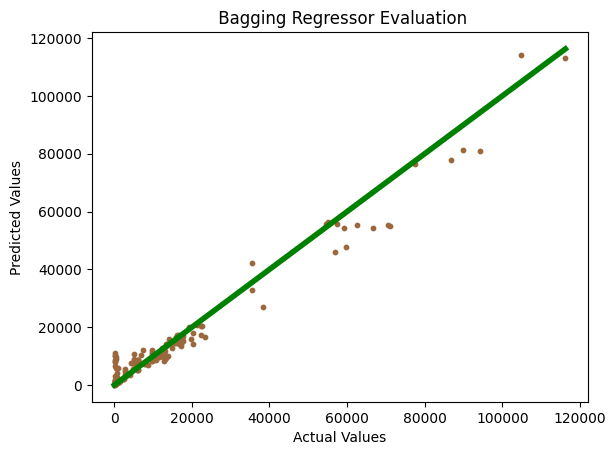

The accuracy of the Adaboost Regressor Model Train is 75.33
The accuracy of the  Adaboost Regressor Model Test is 74.82


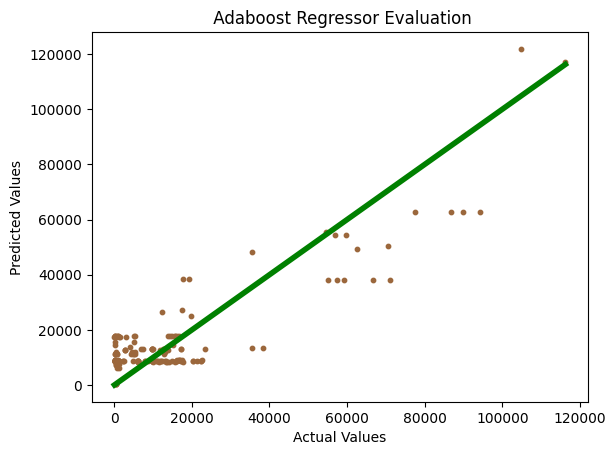

,Model,Accuracy,MSE,R2_score
5,Decision Tree,0.986231,6057118.220778,0.986231
1,Random Forest,0.964941,15422474.013663,0.964941
6,Bagging Regressor,0.963062,16249157.036539,0.963062
2,Gradient Boost,0.936959,27732346.066195,0.936959
7,Adaboost Regressor,0.748232,110754557.229814,0.748232
0,Linear Regression,0.007220,436730282.834535,0.007220
3,XGBoost,-0.067687,469682356.182830,-0.067687
4,KNN,-0.118289,491942370.641562,-0.118289


In [ ]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=1812)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=1812)),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=1812)),
    ('Bagging Regressor', BaggingRegressor(n_estimators=150, random_state=1812)),
    ('Adaboost Regressor', AdaBoostRegressor(n_estimators=100, random_state=1812))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])

dff_sorted = dff.sort_values(by='Accuracy', ascending=False)

df_styled_best = dff_sorted.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)

In [ ]:
df_predict.drop(columns='Unit', inplace=True)

In [ ]:
data_clean = df_predict

le_item = LabelEncoder()
data_clean['Item_Encoded'] = le_item.fit_transform(data_clean['Item'])

X_pred_testing = data_clean[['Item_Encoded', 'Pesticide', 'avg temperature', 'avg humidity', 'rainfall', 'Year']]
y_pred_testing = data_clean['yield']

scaler = StandardScaler()
X_pred_fin = scaler.fit_transform(X_pred_testing)

In [ ]:
best_model_name = dff_sorted.iloc[0]['Model']
best_model = None
for name, model in models:
    if name == best_model_name:
        best_model = model
        break

new_data_predictions = best_model.predict(X_pred_fin)

In [ ]:
comparison_df = pd.DataFrame({
    'Item': data_clean['Item'],
    'Actual': y_pred_testing,
    'Predicted': new_data_predictions
})

print(f'Predictions for new data using the best model ({best_model_name}):')
print(comparison_df)

Predictions for new data using the best model (Decision Tree):
                                                  Item    Actual  \
10                             Abaca, manila hemp, raw     789.3   
23                                          Areca nuts     436.4   
36                                            Avocados   13354.6   
49                                             Bananas   50447.0   
62                                          Beans, dry    1028.8   
75                                            Cabbages   21481.7   
88                        Cantaloupes and other melons   16828.0   
101                                Carrots and turnips   16476.9   
114                              Cashew nuts, in shell     345.8   
127                                     Cassava, fresh   26038.1   
140                                   Castor oil seeds     420.1   
153                          Cauliflowers and broccoli   13027.9   
166  Chillies and peppers, green (Capsicum spp. and..

In [ ]:
comparison_df.to_csv('comparison_predictions.csv', index=False)

In [ ]:
mse = mean_squared_error(y_pred_testing, new_data_predictions)
r2 = r2_score(y_pred_testing, new_data_predictions)
print(f'MSE for new data: {mse}')
print(f'R2 Score for new data: {r2}')

MSE for new data: 22857528.96121771
R2 Score for new data: 0.957908529122024


In [ ]:
encoded_crops = le_item.transform(['Papayas'])[0]

year_2025_features = np.array([[encoded_crops, 0, 0, 0, 0, 2025]])

year_2025_features_scaled = scaler.transform(year_2025_features)

predicted_yield_2025 = best_model.predict(year_2025_features_scaled)

print("Predicted yield for crops in 2025:", predicted_yield_2025)

Predicted yield for crops in 2025: [91891.2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
encoded_crops = le_item.transform(['Cabbages'])[0]

year_2020_features = np.array([[encoded_crops, 0, 0, 0, 0, 2020]])

year_2020_features_scaled = scaler.transform(year_2020_features)

predicted_yield_2020 = best_model.predict(year_2020_features_scaled)

print("Predicted yield for crops in 2020:", predicted_yield_2020)

Predicted yield for crops in 2020: [22559.3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
df_testing_convert = pd.DataFrame(df_testing)
df_testing_convert

,Item,Year,yield,avg temperature,avg humidity,rainfall,Unit,Pesticide
12,"Abaca, manila hemp, raw",2022,782.0,NaN,NaN,NaN,NaN,NaN
25,Areca nuts,2022,522.4,NaN,NaN,NaN,NaN,NaN
38,Avocados,2022,13337.0,NaN,NaN,NaN,NaN,NaN
51,Bananas,2022,49050.5,NaN,NaN,NaN,NaN,NaN
64,"Beans, dry",2022,939.2,NaN,NaN,NaN,NaN,NaN
77,Cabbages,2022,21827.0,NaN,NaN,NaN,NaN,NaN
90,Cantaloupes and other melons,2022,16720.0,NaN,NaN,NaN,NaN,NaN
103,Carrots and turnips,2022,18874.8,NaN,NaN,NaN,NaN,NaN
116,"Cashew nuts, in shell",2022,353.3,NaN,NaN,NaN,NaN,NaN
129,"Cassava, fresh",2022,27196.7,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_testing_convert.drop(columns=['avg temperature', 'avg humidity', 'rainfall', 'Unit', 'Pesticide'], inplace=True)
df_testing_convert

,Item,Year,yield
12,"Abaca, manila hemp, raw",2022,782.0
25,Areca nuts,2022,522.4
38,Avocados,2022,13337.0
51,Bananas,2022,49050.5
64,"Beans, dry",2022,939.2
77,Cabbages,2022,21827.0
90,Cantaloupes and other melons,2022,16720.0
103,Carrots and turnips,2022,18874.8
116,"Cashew nuts, in shell",2022,353.3
129,"Cassava, fresh",2022,27196.7


In [ ]:
encoded_crops = le_item.transform(['Cabbages'])[0]

year_2020_features = np.array([[encoded_crops, 0, 0, 0, 0, 2022]])

year_2020_features_scaled = scaler.transform(year_2020_features)

predicted_yield_2020 = best_model.predict(year_2020_features_scaled)

print("Predicted yield for crops in 2020:", predicted_yield_2020)

In [ ]:
features_2022 = []

for _, row in df_testing_convert.iterrows():
    encoded_crops = le_item.transform([row['Item']])[0]
    features = [encoded_crops, 0, 0, 0, 0, 2022]
    features_2022.append(features)

features_2022_array = np.array(features_2022)

features_2022_scaled = scaler.transform(features_2022_array)

predicted_yield_2022 = best_model.predict(features_2022_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
df_testing_convert['Predicted_Yield_2022'] = predicted_yield_2022
print(df_testing_convert)

                                                  Item  Year     yield  \
12                             Abaca, manila hemp, raw  2022     782.0   
25                                          Areca nuts  2022     522.4   
38                                            Avocados  2022   13337.0   
51                                             Bananas  2022   49050.5   
64                                          Beans, dry  2022     939.2   
77                                            Cabbages  2022   21827.0   
90                        Cantaloupes and other melons  2022   16720.0   
103                                Carrots and turnips  2022   18874.8   
116                              Cashew nuts, in shell  2022     353.3   
129                                     Cassava, fresh  2022   27196.7   
142                                   Castor oil seeds  2022     417.6   
155                          Cauliflowers and broccoli  2022   12723.5   
168  Chillies and peppers, green (Caps

In [ ]:
df_testing_convert.to_csv('df_testing_convert_with_predictions.csv', index=False)

In [ ]:
true_yield_2022 = df_testing_convert['yield'].values
mse = mean_squared_error(true_yield_2022, predicted_yield_2022)
r2 = r2_score(true_yield_2022, predicted_yield_2022)

print(f'MSE score: {mse}')
print(f'R2-Score: {r2}')

MSE score: 7469694.723333338
R2-Score: 0.9866248616781494
